<a href="https://colab.research.google.com/github/OGentle/self_practice/blob/main/net_dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 最短路径路由算法（Dijkstra算法）



#### 1.随机生成一个num_point个点的图

<function matplotlib.pyplot.show>

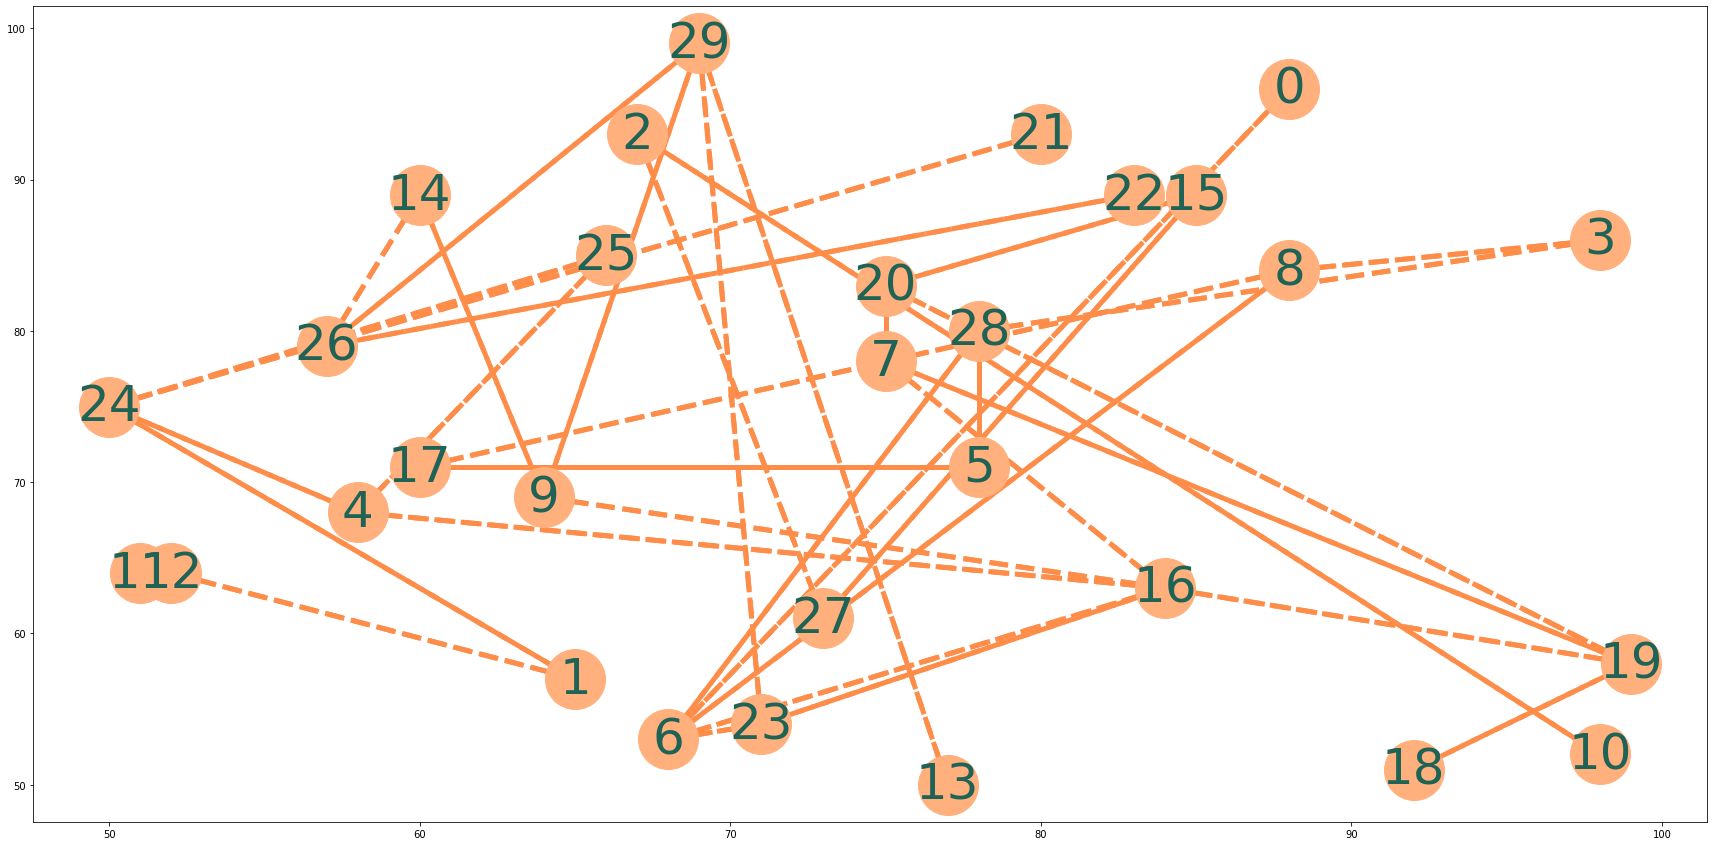

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math


num_point=30
num_block=35
points=np.random.randint(50,100,size=(num_point,2))


##获得距离矩阵
distance=np.zeros([num_point,num_point],dtype=float)
for i in range(num_point):
    for j in range(i,num_point):
        distance[i,j]=np.linalg.norm(points[i,:]-points[j,:],ord=2)
        distance[j,i]=distance[i,j]

index =np.random.choice(num_point,size=[1,num_point],replace=False)
for i in range(num_block):
    temp_index=np.random.choice(num_point,size=[1,num_point],replace=False)
    distance[index,temp_index]=np.inf
    distance[temp_index,index]=np.inf
distance[index,index]=0


#图的可视化
plt.figure(0,figsize=(30,20))
for i in range(num_point):
    for j in range(num_point):
        if distance[i,j] != np.inf:
            plt.plot([points[i,0],points[j,0]],[points[i,1],points[j,1]],color='#fd8d49',linestyle='--',linewidth=5)
for i in range(num_point):
    plt.plot(points[i,0], points[i,1],marker='o',markerfacecolor='#ffb07c',markeredgecolor='#ffb07c',markersize=60)
    plt.text(points[i,0], points[i,1],i,color='#1f6357',fontsize=50, multialignment='center',verticalalignment='center',horizontalalignment='center')
# plt.savefig('E://map.png')
plt.show


#print(distance)
#print(points)

#### 2.给定源点source_point，得到各个点到源点的最短路径，以及最短路径长度

In [4]:
##算法初始化
source_point=20
wp=source_point
points_dis=np.ones([num_point])*np.inf
points_dis[source_point]=0
points_tag=np.ones([num_point],dtype=bool)
points_trace=np.ones([num_point])*(-1)
points_trace=np.array(points_trace,dtype=int)
points_code=np.array(range(num_point),dtype=int)


for i in range(num_point):
    for k in range(num_point):
        if all([(points_dis[k]<max(points_dis[points_tag])),(points_tag[k]!=False)]):
            wp=k
    points_tag[wp]=False   
    print(wp)#调试信息
    for j in points_code[points_tag]:
        if points_dis[wp]+distance[wp,j]<points_dis[j]:
            points_dis[j]=points_dis[wp]+distance[wp,j]
            points_trace[j]=wp
            #print(wp,j)#调试信息
            
print(points_trace)
print(points_trace.shape)
print(points_dis)




20
19
18
16
23
29
26
22
15
27
14
13
9
7
6
28
8
17
5
4
25
24
21
3
2
10
1
12
0
0
[ 6 24 27  8 16 28 16 20  6 16  2 -1  1 29 26 20 19  8 19 20 -1 24 26 16
  4  4 29 15  6 23]
(30,)
[116.75842027 111.00413463  74.68263741 116.42456999  76.94323979
 107.12715757  69.33479747   5.         106.22653096  71.34744822
 126.08302651          inf 125.76895769 160.97141237 145.08676011
  11.66190379  50.4668352  137.09722904  44.55494184  34.6554469
   0.         122.55909697 162.50323016  66.2782235   87.57338561
  95.73153402 134.6464536   42.12499621  98.12715757 111.32264602]


#### 3.在原图上绘制出由源点生成的最短路径树

FileNotFoundError: ignored

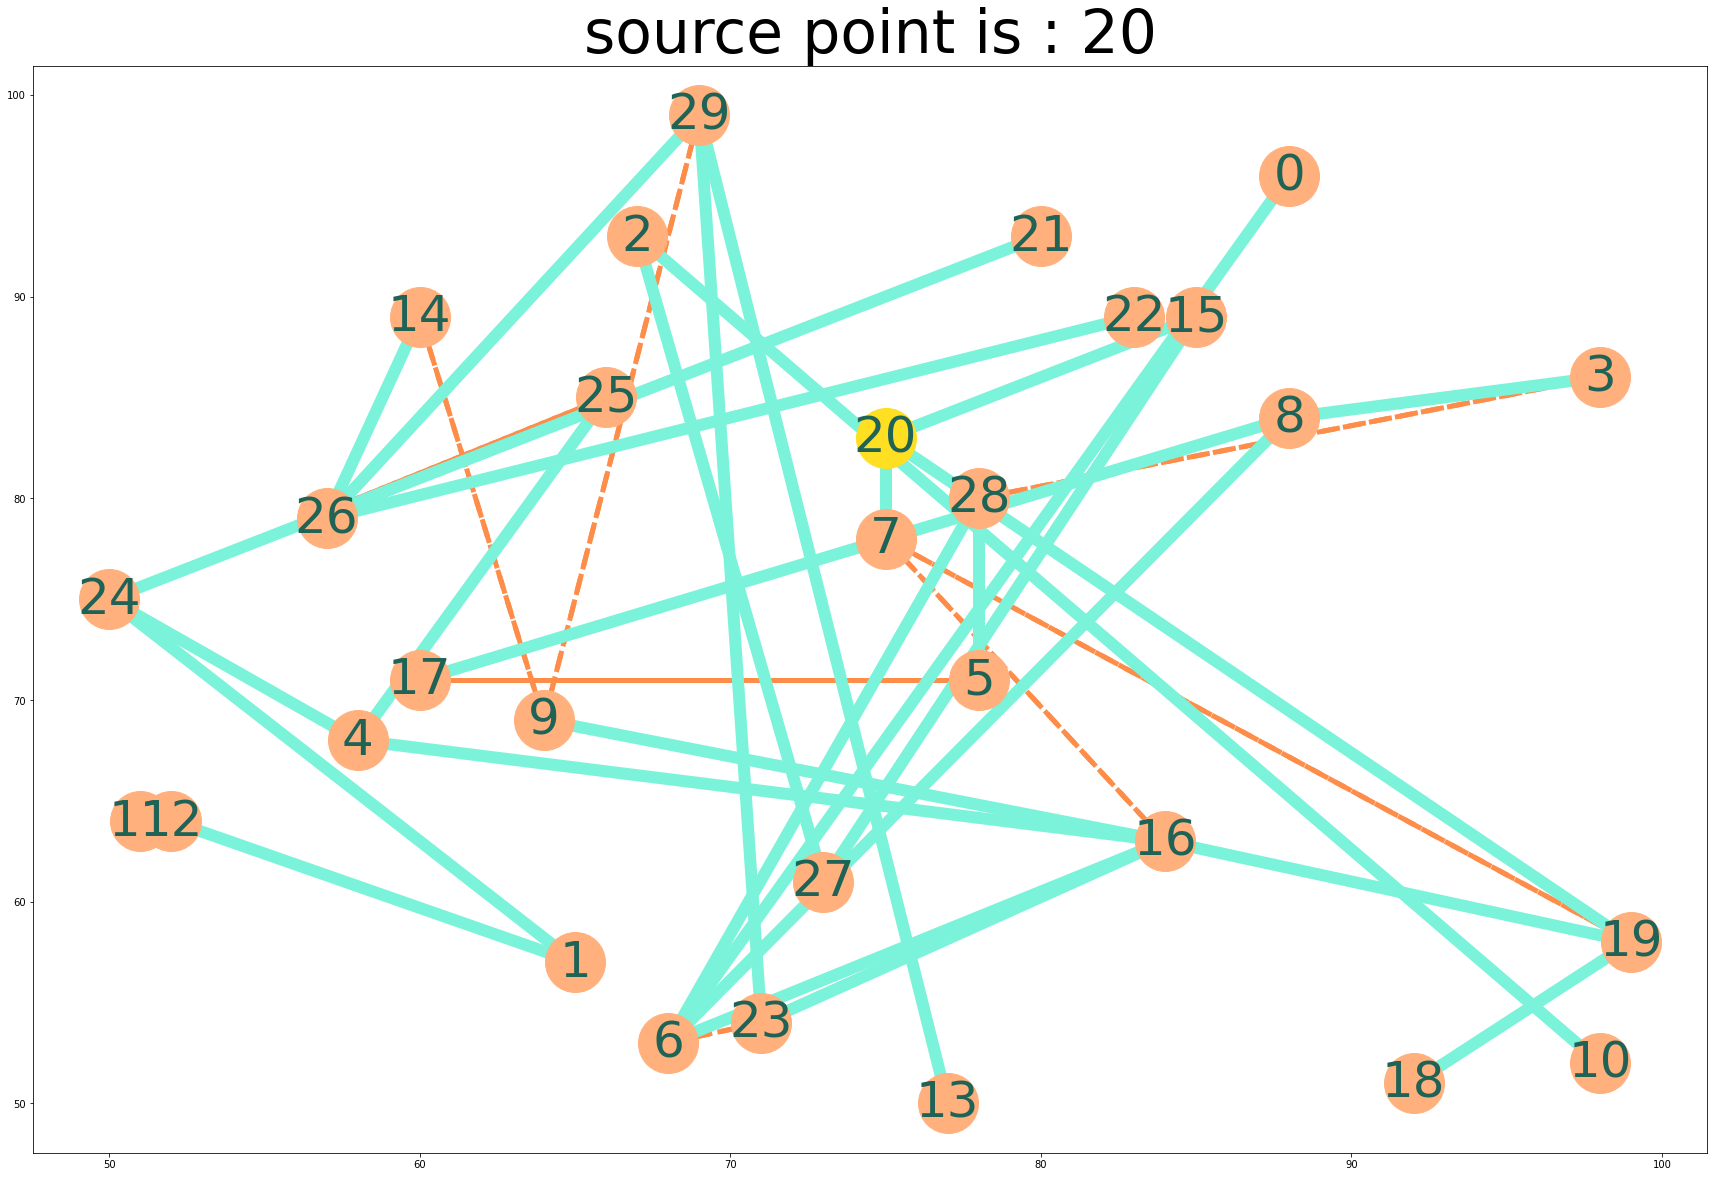

In [5]:



plt.figure(1,figsize=(30,20))
plt.title('source point is : '+str(source_point),fontsize=60)
for i in range(num_point):
    for j in range(num_point):
        if distance[i,j] != np.inf:
            plt.plot([points[i,0],points[j,0]],[points[i,1],points[j,1]],color='#fd8d49',linestyle='--',linewidth=5)
for i in range(num_point):
    if all([(points_dis[i]!=np.inf),(points_trace[i]>=0)]):
        plt.plot([points[i,0],points[points_trace[i],0]],[points[i,1],points[points_trace[i],1]],color='#7bf2da',linestyle='-',linewidth=12)
for i in range(num_point):
    if i==source_point:
        plt.plot(points[i,0], points[i,1],marker='o',markerfacecolor='#ffdf22',markeredgecolor='#ffdf22',markersize=60)
    else:
        plt.plot(points[i,0], points[i,1],marker='o',markerfacecolor='#ffb07c',markeredgecolor='#ffb07c',markersize=60)
    plt.text(points[i,0], points[i,1],i,color='#1f6357',fontsize=50, multialignment='center',verticalalignment='center',horizontalalignment='center')
                

plt.show
# plt.savefig('E://path.png')

In [8]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [10]:
from google.colab import drive
drive.mount('ai_ws')

Mounted at ai_ws
